# Root mean square propagation (RMSprop) SoftMax

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 120
n2 = 15
eta = 0.3 #learning rate

Nepoch = 2500
Nbatch = 12
Batchsize = 10

epsi = 10**(-8)

In [3]:
# ETAPE 2

# génération des données d'apprentissage

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:60] = np.sin(2*np.pi*U[0][:60])
X[0][60:] = np.exp(U[0][60:])-1

y = np.zeros((2,n)).reshape(2,n)
y[0][:60] = 1
y[0][60:] = 0

In [4]:
np.shape(y)

(2, 120)

In [5]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(2,n2)
b3 = np.random.randn(2,1)

In [7]:
print(np.shape(W2))
print(np.shape(b2))
print(np.shape(W3))
print(np.shape(b3))

(15, 1)
(15, 1)
(2, 15)
(2, 1)


In [8]:
# ETAPE 4.1
def softmax(z):
    
    u = 1.0/np.sum(np.exp(z), axis=0)
    
    return u*np.exp(z)

In [9]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def backpropagation(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = softmax(z3)

    # Calcul
    delta3 = a3-y
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    dCdW3 = np.dot(delta3,a2.T)
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [10]:
# ETAPE 6

# Définition de la fonction coût
def cost(y,y_pred):
    xx = -np.sum(y*np.log(y_pred), axis=0)
    return np.sum(xx)/n

In [11]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = softmax(z3)
     
    return a3

In [12]:
Cost = np.zeros(Nepoch)
beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)

HkW2=np.zeros(W2.shape)
HkW3=np.zeros(W3.shape)
Hkb2=np.zeros(b2.shape)
Hkb3=np.zeros(b3.shape)

for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    (X,y) = shuffle(X.T,y.T)
    X = X.T
    y = y.T
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)

    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = backpropagation(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
            
        dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2*dCdW2
        dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3*dCdW3
        dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2*dCdb2
        dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3*dCdb3
            
        HkW2=1/(np.sqrt(dCdW2_avg+epsi))
        HkW3=1/(np.sqrt(dCdW3_avg+epsi))
        Hkb2=1/(np.sqrt(dCdb2_avg+epsi))
        Hkb3=1/(np.sqrt(dCdb3_avg+epsi))
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*HkW2*dCdW2
        W3 = W3 - (eta/Batchsize)*HkW3*dCdW3
        b2 = b2 - (eta/Batchsize)*Hkb2*dCdb2
        b3 = b3 - (eta/Batchsize)*Hkb3*dCdb3


C:\Users\tnngo1\AppData\Local\Temp/ipykernel_13388/2352360198.py:4: RuntimeWarning: overflow encountered in true_divide
  u = 1.0/np.sum(np.exp(z), axis=0)
C:\Users\tnngo1\AppData\Local\Temp/ipykernel_13388/1144825362.py:55: RuntimeWarning: invalid value encountered in multiply
  W2 = W2 - (eta/Batchsize)*HkW2*dCdW2
C:\Users\tnngo1\AppData\Local\Temp/ipykernel_13388/1144825362.py:56: RuntimeWarning: invalid value encountered in multiply
  W3 = W3 - (eta/Batchsize)*HkW3*dCdW3
C:\Users\tnngo1\AppData\Local\Temp/ipykernel_13388/1144825362.py:57: RuntimeWarning: invalid value encountered in multiply
  b2 = b2 - (eta/Batchsize)*Hkb2*dCdb2
C:\Users\tnngo1\AppData\Local\Temp/ipykernel_13388/1144825362.py:58: RuntimeWarning: invalid value encountered in multiply
  b3 = b3 - (eta/Batchsize)*Hkb3*dCdb3


In [13]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,

In [14]:
def classification(y_true,y_pred):
    y_pred[:][0] = np.round(y_pred[:][0])
    C = (np.abs(y_true[:][0]-y_pred[:][0])).sum()
    return 1 - ((C)/n)


In [15]:
# génération des données de la validation

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:60] = np.sin(2*np.pi*U[0][:60])
X[0][60:] = np.exp(U[0][60:])-1

y = np.zeros((2,n)).reshape(2,n)
y[0][:60] = 1
y[0][60:] = 0

In [16]:
classification(y,y_pred)

nan

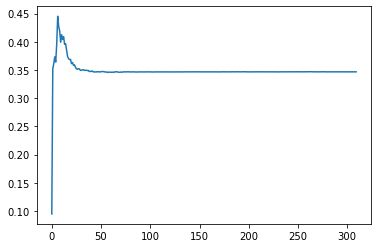

In [17]:
plt.plot(Cost)